In [852]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib as plt 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression






In [853]:
csv_path = r'C:\Users\MSI\Desktop\Projet_ML\titanic_data.csv'  
Mydata = pd.read_csv(csv_path)
print(Mydata.columns)



Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')


In [854]:
print(Mydata.head())
 

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [855]:
print(Mydata.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [856]:
print(Mydata.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [857]:
Mydata.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

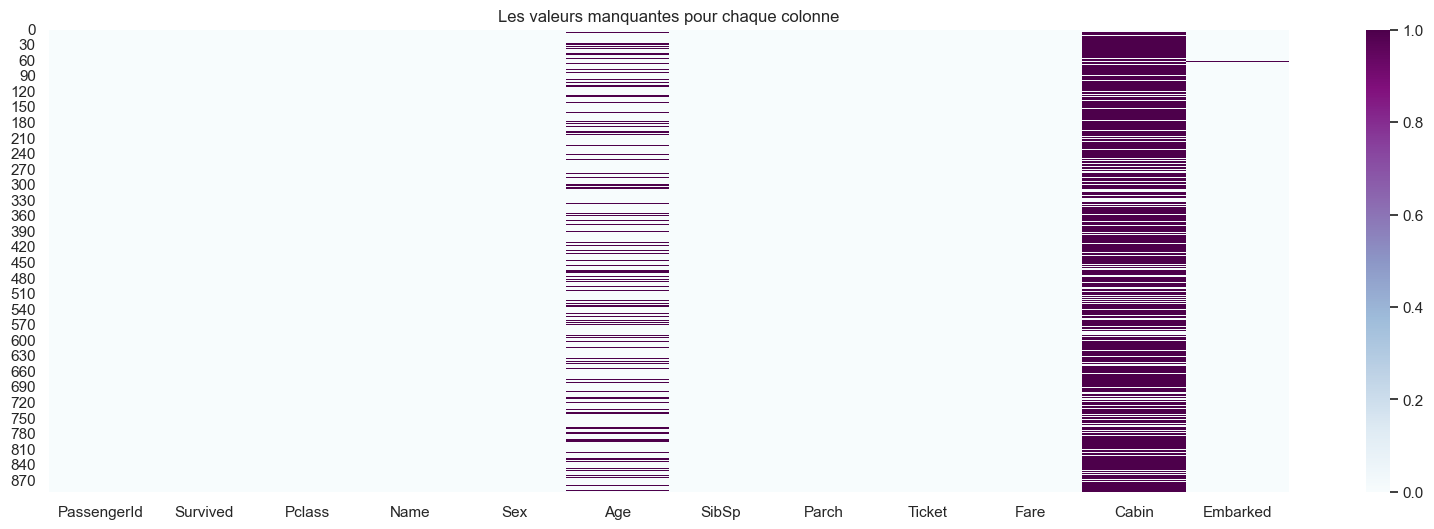

In [858]:
plt.figure(figsize=(20,6))
plt.title('Les valeurs manquantes pour chaque colonne')
sns.heatmap(Mydata.isnull(),cmap='BuPu');

In [859]:
Mydata.drop(columns='Cabin', inplace=True)
Mydata.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [860]:
Mydata['Age'] = Mydata['Age'].fillna(np.ceil(Mydata['Age'].mean()))
Mydata['Embarked'] = Mydata['Embarked'].fillna(Mydata['Embarked'].mode()[0]) 



In [861]:
Mydata.isnull().sum()



PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

Pclass: Classe socio-économique (1 = Classe supérieure; 2 = Classe moyenne; 3 = Classe inférieure) 

Name: Nom du passager

Sex: Sexe du passager   (div en 0 et 1)

Age: Âge du passager  

SibSp: Nombre de frères et sœurs / conjoints du passager à bord 

Parch: Nombre de parents / enfants du passager à bord  

Ticket: Numéro de billet du passager 

Fare: Prix payé par le passager 

Cabin: Numéro de cabine du passager  (déja supp)

Embarked: Port d'embarquement du passager (C = Cherbourg; Q = Queenstown; S = Southampton) (diviser ça aprés pour travailler sur les modeles )

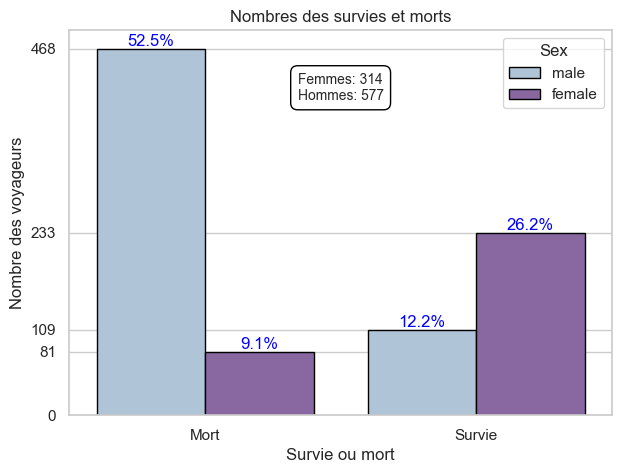

In [862]:
plt.figure(figsize=(7, 5), dpi=100)

sns.countplot(data=Mydata, x='Survived', hue='Sex', palette='BuPu', edgecolor='black')
plt.xlabel('Survie ou mort')
plt.ylabel('Nombre des voyageurs')
plt.xticks(ticks=[0, 1], labels=['Mort', 'Survie'], rotation=0)
plt.title('Nombres des survies et morts')

total_counts_female_survived = len(Mydata[(Mydata['Survived'] == 1) & (Mydata['Sex'] == 'female')])
total_counts_female_not_survived = len(Mydata[(Mydata['Survived'] == 0) & (Mydata['Sex'] == 'female')])
total_counts_male_survived = len(Mydata[(Mydata['Survived'] == 1) & (Mydata['Sex'] == 'male')])
total_counts_male_not_survived = len(Mydata[(Mydata['Survived'] == 0) & (Mydata['Sex'] == 'male')])

total_people = len(Mydata)

for patch in plt.gca().patches:
    height = patch.get_height()
    if height != 0:  
        total = total_people  
        percentage = (height / total) * 100
        plt.gca().annotate(f'{percentage:.1f}%', (patch.get_x() + patch.get_width() / 2., height),
                           ha='center', va='bottom', color='blue')

plt.yticks(ticks=[0, total_counts_female_not_survived, total_counts_female_survived,
                  total_counts_male_not_survived, total_counts_male_survived],
           labels=['0', str(total_counts_female_not_survived), str(total_counts_female_survived),
                   str(total_counts_male_not_survived), str(total_counts_male_survived)])

total_females = total_counts_female_survived + total_counts_female_not_survived
total_males = total_counts_male_survived + total_counts_male_not_survived
plt.text(0.5, max(total_counts_female_not_survived, total_counts_female_survived, 
                 total_counts_male_not_survived, total_counts_male_survived) - 50 ,
         f'Femmes: {total_females}\nHommes: {total_males}',
         fontsize=10, ha='center', va='center', bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()


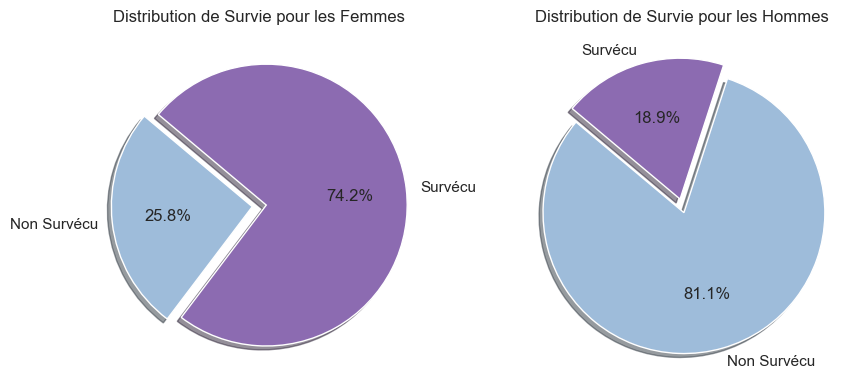

In [863]:
import matplotlib.pyplot as plt

# Calcul des données de survie par sexe
survived_counts = Mydata.groupby(['Sex', 'Survived']).size().unstack()


colors = ['#9ebcda', '#8c6bb1']
labels_fr = ['Non Survécu', 'Survécu']

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.pie(survived_counts.loc['female'], labels=labels_fr, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05,0.05), shadow=True)
plt.title('Distribution de Survie pour les Femmes')

plt.subplot(1, 2, 2)
plt.pie(survived_counts.loc['male'], labels=labels_fr, autopct='%1.1f%%', startangle=140, colors=colors, explode=(0.05,0.05), shadow=True)
plt.title('Distribution de Survie pour les Hommes')

plt.show()


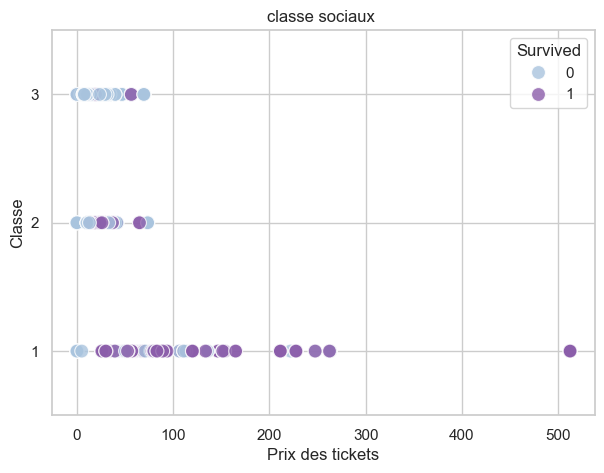

In [864]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(7, 5), dpi=100)

sns.scatterplot(data=Mydata, x="Fare", y="Pclass", hue="Survived", palette="BuPu", s=100, alpha=0.8)
plt.title('classe sociaux ')
plt.xlabel('Prix des tickets')
plt.ylabel('Classe')
plt.ylim(0.5, 3.5)  
plt.yticks([1, 2, 3])
plt.show()


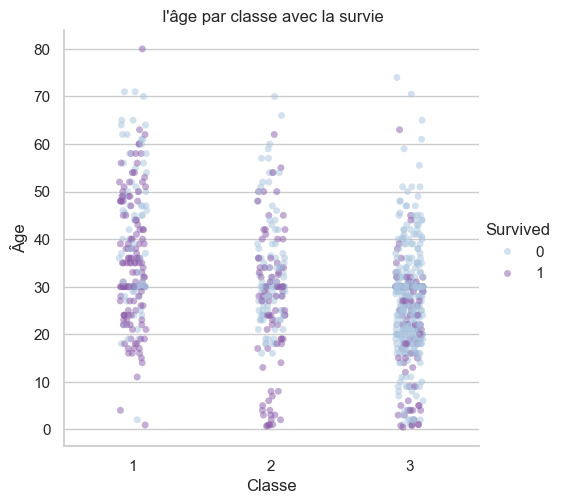

In [865]:
sns.catplot(data=Mydata, x="Pclass", y="Age", hue="Survived", palette="BuPu", alpha=0.5)
plt.title(' l\'âge par classe avec la survie')
plt.xlabel('Classe')
plt.ylabel('Âge')
plt.show()


C:\Users\MSI\AppData\Local\Temp\ipykernel_14476\362841428.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Pclass", y="Survived", data=Mydata, palette='viridis')


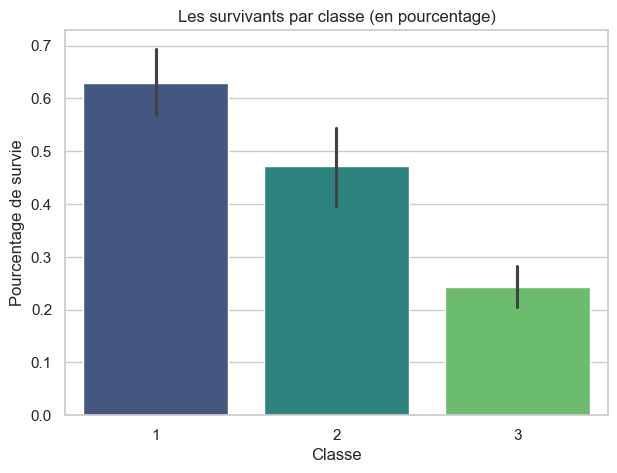

In [866]:
plt.figure(figsize=(7, 5), dpi=100)
sns.barplot(x="Pclass", y="Survived", data=Mydata, palette='viridis')
totals = Mydata.groupby('Pclass').size()
survived = Mydata.groupby('Pclass')['Survived'].sum()
percentages = (survived / totals) * 100

plt.ylabel('Pourcentage de survie')
plt.title('Les survivants par classe (en pourcentage)')
plt.xlabel('Classe')
plt.show()


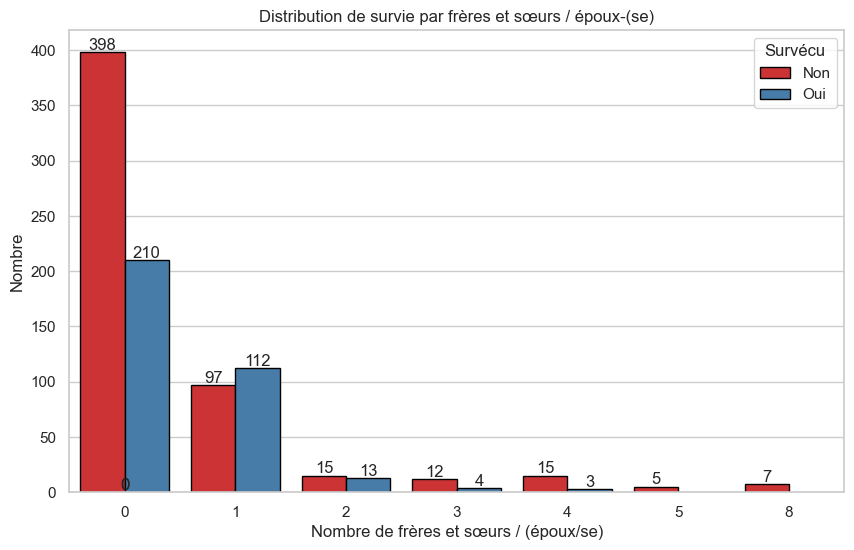

In [867]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='SibSp', hue='Survived', data=Mydata, palette='Set1', edgecolor='black')

plt.title('Distribution de survie par frères et sœurs / époux-(se)')
plt.xlabel('Nombre de frères et sœurs / (époux/se)')
plt.ylabel('Nombre')
plt.legend(title='Survécu', labels=['Non', 'Oui'])

# Ajouter le nombre au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()


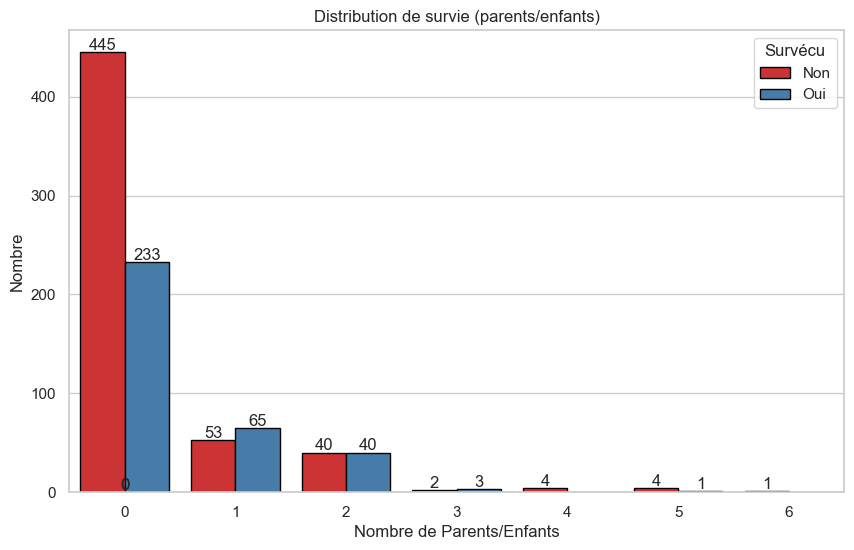

In [868]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
ax = sns.countplot(x='Parch', hue='Survived', data=Mydata, palette='Set1', edgecolor='black')

plt.title('Distribution de survie (parents/enfants)')
plt.xlabel('Nombre de Parents/Enfants')
plt.ylabel('Nombre')
plt.legend(title='Survécu', labels=['Non', 'Oui'])

# Ajouter le nombre au-dessus de chaque barre
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')

plt.show()


C:\Users\MSI\AppData\Local\Temp\ipykernel_14476\1098966456.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(data=Mydata_with_names, x='Embarked_full', edgecolor='black', palette=palette)


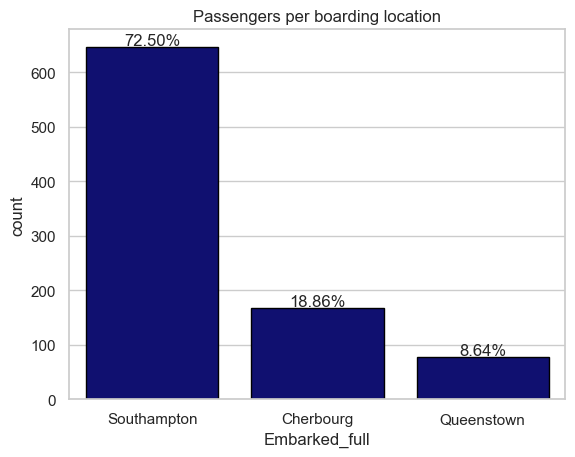

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [869]:
# Vos données et votre mapping
embarked_mapping = {'C': 'Cherbourg', 'Q': 'Queenstown', 'S': 'Southampton'}
Mydata_with_names = Mydata.copy()
Mydata_with_names['Embarked_full'] = Mydata_with_names['Embarked'].map(embarked_mapping)

# Création du graphique avec seaborn
sns.set(style="whitegrid")

# Comptage des valeurs
total = float(len(Mydata_with_names))
ax = sns.countplot(data=Mydata_with_names, x='Embarked_full', edgecolor='black', palette=palette)

# Ajout des pourcentages sur les barres
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:.2f}%'.format((height/total)*100),
            ha="center")

plt.title("Passengers per boarding location")
plt.show()

print(Mydata.head())  


In [870]:
colonne_HM = Mydata.select_dtypes(include=['int64', 'float64'])
print(colonne_HM)



     PassengerId  Survived  Pclass   Age  SibSp  Parch     Fare
0              1         0       3  22.0      1      0   7.2500
1              2         1       1  38.0      1      0  71.2833
2              3         1       3  26.0      0      0   7.9250
3              4         1       1  35.0      1      0  53.1000
4              5         0       3  35.0      0      0   8.0500
..           ...       ...     ...   ...    ...    ...      ...
886          887         0       2  27.0      0      0  13.0000
887          888         1       1  19.0      0      0  30.0000
888          889         0       3  30.0      1      2  23.4500
889          890         1       1  26.0      0      0  30.0000
890          891         0       3  32.0      0      0   7.7500

[891 rows x 7 columns]


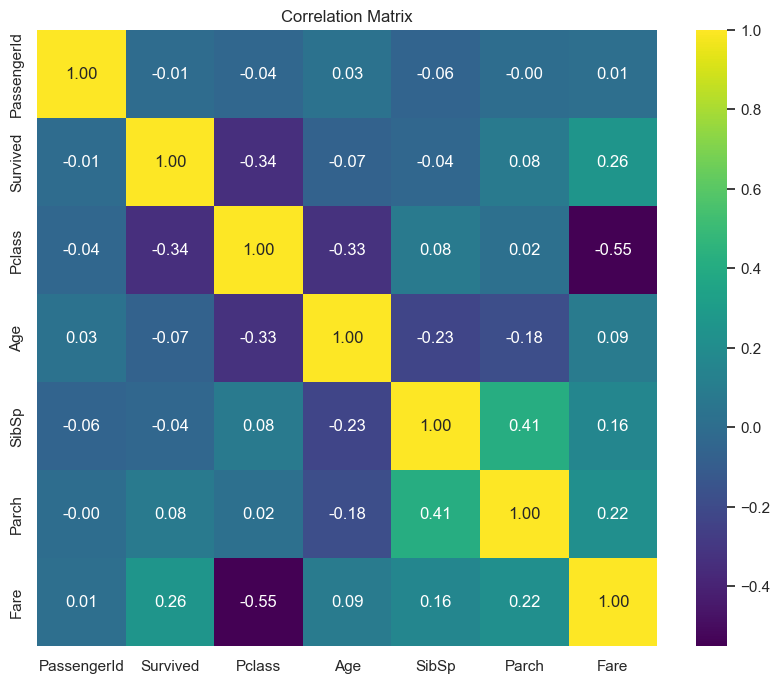

In [871]:
correlation_matrix_num = colonne_HM.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_num, annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [872]:
print(Mydata.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB
None


In [873]:
print(Mydata.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Embarked  
0      0         A/5 21171   7.2500        S  
1      0          PC 17599  71.2833        C  
2      0  STON/O2. 3101282   7.9250        S  
3      0            113803  53.1000        S  
4      0            373450   8.0500        S  


In [874]:
Mydata.drop(columns=['Name', 'PassengerId', 'Ticket',], inplace=True)
print(Mydata.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
None


In [875]:
Mydata['Embarked'].unique()
Mydata['Sex'].unique()

colonne_c = Mydata.dtypes[Mydata.dtypes == "object"].index
print("Before")
print(Mydata.shape)
Mydata = pd.get_dummies(Mydata).astype(int)
print("After")
print(Mydata.shape)



Before
(891, 8)
After
(891, 11)


In [876]:
print(Mydata.head)



<bound method NDFrame.head of      Survived  Pclass  Age  SibSp  Parch  Fare  Sex_female  Sex_male  \
0           0       3   22      1      0     7           0         1   
1           1       1   38      1      0    71           1         0   
2           1       3   26      0      0     7           1         0   
3           1       1   35      1      0    53           1         0   
4           0       3   35      0      0     8           0         1   
..        ...     ...  ...    ...    ...   ...         ...       ...   
886         0       2   27      0      0    13           0         1   
887         1       1   19      0      0    30           1         0   
888         0       3   30      1      2    23           1         0   
889         1       1   26      0      0    30           0         1   
890         0       3   32      0      0     7           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1             1      

In [877]:
print(Mydata[['Fare', 'Sex_female', 'Sex_male']])


     Fare  Sex_female  Sex_male
0       7           0         1
1      71           1         0
2       7           1         0
3      53           1         0
4       8           0         1
..    ...         ...       ...
886    13           0         1
887    30           1         0
888    23           1         0
889    30           0         1
890     7           0         1

[891 rows x 3 columns]


In [878]:
Decision_Tree = Mydata.copy()
Logistic_Regression = Mydata.copy()
KNN = Mydata.copy()
SVM = Mydata.copy()
Random_Forest = Mydata.copy()
Gradient_Boosting = Mydata.copy()


In [879]:
X = Mydata.drop('Survived', axis=1)
y = Mydata['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

random_state = 42 




Decision Tree Classifier




In [880]:


from sklearn.tree import DecisionTreeClassifier
classifier_decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=1, min_samples_split=10)
classifier_decision_tree.fit(X_train, y_train)


kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
cv_scores_kf = cross_val_score(classifier_decision_tree, X, y, cv=kf)
print("KFold Cross-validation scores:", cv_scores_kf)
print("Mean KFold CV accuracy:", cv_scores_kf.mean())

KFold Cross-validation scores: [0.79888268 0.80337079 0.85393258 0.78651685 0.84269663]
Mean KFold CV accuracy: 0.817079907099366


In [881]:
y_pred_DT = classifier_decision_tree.predict(X_test)

precision_DT = precision_score(y_test, y_pred_DT)
recall_DT = recall_score(y_test, y_pred_DT)
accuracy_DT = accuracy_score(y_test, y_pred_DT)
f1_DT = f1_score(y_test, y_pred_DT)

print("Précision:", precision_DT)
print("recall_RF:", recall_DT)
print("accurancy:", accuracy_DT)
print("Score F1:", f1_DT)



Précision: 0.8166666666666667
recall_RF: 0.6621621621621622
accurancy: 0.7988826815642458
Score F1: 0.7313432835820896


Logistic Regression


In [882]:
from sklearn.linear_model import LogisticRegression

pipeline_logistic = make_pipeline(StandardScaler(), LogisticRegression(C=2, solver='lbfgs'))

pipeline_logistic.fit(X_train, y_train)
cv_scores_kf_logistic = cross_val_score(pipeline_logistic, X, y, cv=5)
print("KFold Cross-validation scores for Logistic Regression:", cv_scores_kf_logistic)
print("Mean KFold CV accuracy for Logistic Regression:", cv_scores_kf_logistic.mean())

KFold Cross-validation scores for Logistic Regression: [0.77653631 0.78651685 0.78089888 0.76966292 0.82022472]
Mean KFold CV accuracy for Logistic Regression: 0.7867679367271359


In [883]:

y_pred_logistic_regression = pipeline_logistic.predict(X_test)
precision_logistic_regression = precision_score(y_test, y_pred_logistic_regression)
recall_logistic_regression = recall_score(y_test, y_pred_logistic_regression)
accuracy_logistic_regression = accuracy_score(y_test, y_pred_logistic_regression)
f1_logistic_regression = f1_score(y_test, y_pred_logistic_regression)

print("Précision (Logistic Regression):", precision_logistic_regression)
print("recall_RF (Logistic Regression):", recall_logistic_regression)
print("accurency(Logistic Regression):", accuracy_logistic_regression)
print("Score F1 (Logistic Regression):", f1_logistic_regression)


Précision (Logistic Regression): 0.7857142857142857
recall_RF (Logistic Regression): 0.7432432432432432
accurency(Logistic Regression): 0.8100558659217877
Score F1 (Logistic Regression): 0.7638888888888888


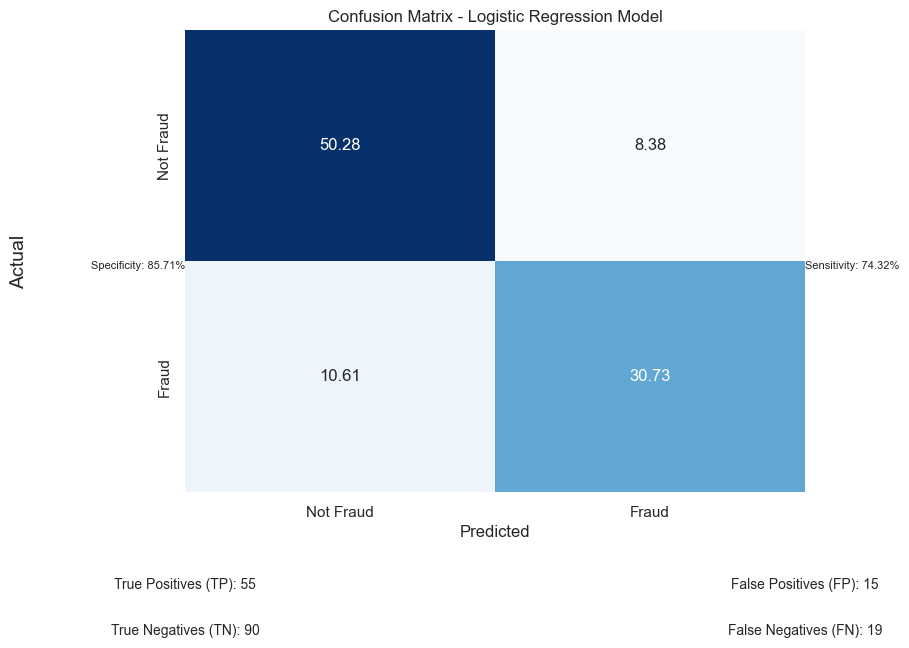

In [884]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

conf_matrix_logistic_regression = confusion_matrix(y_test, y_pred_logistic_regression)

tn, fp, fn, tp = conf_matrix_logistic_regression.ravel()

total_samples = len(y_test)
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = (tp + tn) / total_samples * 100

conf_matrix_percent = conf_matrix_logistic_regression / total_samples * 100

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues", cbar=False,
            xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual', rotation=90, labelpad=100, fontsize=14, verticalalignment='center')
plt.title('Confusion Matrix - Logistic Regression Model')
plt.text(0, 0.5, f"Specificity: {specificity:.2f}%", horizontalalignment='right', verticalalignment='top', fontsize=8, transform=plt.gca().transAxes)
plt.text(1, 0.5, f"Sensitivity: {sensitivity:.2f}%", horizontalalignment='left', verticalalignment='top', fontsize=8, transform=plt.gca().transAxes)
plt.text(0, -0.2, f"True Positives (TP): {tp}", horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.text(1, -0.2, f"False Positives (FP): {fp}", horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.text(0, -0.3, f"True Negatives (TN): {tn}", horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.text(1, -0.3, f"False Negatives (FN): {fn}", horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.show()


KNN

In [885]:
pipeline_knn = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=5, metric='euclidean', weights='uniform'))


pipeline_knn.fit(X_train, y_train)


cv_scores_kf = cross_val_score(pipeline_knn, X, y, cv=5)
print("KFold Cross-validation scores:", cv_scores_kf)
print("Mean KFold CV accuracy:", cv_scores_kf.mean())

KFold Cross-validation scores: [0.7877095  0.78651685 0.81460674 0.80898876 0.81460674]
Mean KFold CV accuracy: 0.8024857196660597


In [886]:

y_pred_KNN = pipeline_knn.predict(X_test)
precision_KNN = precision_score(y_test, y_pred_KNN)
recall_KNN = recall_score(y_test, y_pred_KNN)
accuracy_KNN = accuracy_score(y_test, y_pred_KNN)


f1_KNN = f1_score(y_test, y_pred_KNN)

print("Précision:", precision_KNN)
print("recall:", recall_KNN)
print("Accuracy:", accuracy_KNN)
print("Score F1:", f1_KNN)


Précision: 0.7794117647058824
recall: 0.7162162162162162
Accuracy: 0.7988826815642458
Score F1: 0.7464788732394366


SVM

In [887]:
pipeline_svm = make_pipeline(StandardScaler(), SVC())


pipeline_svm.fit(X_train, y_train)


cv_scores_kf = cross_val_score(pipeline_svm, X, y, cv=5)
print("KFold Cross-validation scores:", cv_scores_kf)
print("Mean KFold CV accuracy:", cv_scores_kf.mean())

KFold Cross-validation scores: [0.83240223 0.8258427  0.80898876 0.79775281 0.86516854]
Mean KFold CV accuracy: 0.826031008725127


In [888]:
y_pred_SVM = pipeline_svm.predict(X_test)
precision_SVM = precision_score(y_test, y_pred_SVM)
recall_SVM = recall_score(y_test, y_pred_SVM)
accuracy_SVM = accuracy_score(y_test, y_pred_SVM)


f1_SVM = f1_score(y_test, y_pred_SVM)

print("Précision:", precision_SVM)
print("recall:", recall_SVM)
print("Accuracy:", accuracy_SVM)
print("Score F1:", f1_SVM)


Précision: 0.8387096774193549
recall: 0.7027027027027027
Accuracy: 0.8212290502793296
Score F1: 0.7647058823529411


Random Forest

In [889]:
classifier_random_forest = RandomForestClassifier(n_estimators=100, max_depth=5,criterion='entropy',  min_samples_leaf=1, min_samples_split=10)

classifier_random_forest.fit(X_train, y_train)
kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
cv_scores_kf = cross_val_score(classifier_random_forest, X, y, cv=kf)
print("KFold Cross-validation scores:", cv_scores_kf)
print("Mean KFold CV accuracy:", cv_scores_kf.mean())



KFold Cross-validation scores: [0.80446927 0.80898876 0.88764045 0.79213483 0.83146067]
Mean KFold CV accuracy: 0.824938798568828


In [890]:


y_pred_RF = classifier_random_forest.predict(X_test)



precision_RF = precision_score(y_test, y_pred_RF)


recall_RF = recall_score(y_test, y_pred_RF)


accuracy_RF = accuracy_score(y_test, y_pred_RF)


f1_RF = f1_score(y_test, y_pred_RF)

print("Précision:", precision_RF)
print("recall:", recall_RF)
print("Accuracy:", accuracy_RF)
print("Score F1:", f1_RF)



Précision: 0.8
recall: 0.7027027027027027
Accuracy: 0.8044692737430168
Score F1: 0.7482014388489209


GradientBoostingClassifier

In [891]:
classifier_gradient_boosting = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=5, min_samples_split=10, min_samples_leaf=1, subsample=0.9)


classifier_gradient_boosting.fit(X_train, y_train)

kf = KFold(n_splits=5, shuffle=True, random_state=random_state)
cv_scores_kf = cross_val_score(classifier_gradient_boosting, X, y, cv=kf)
print("KFold Cross-validation scores:", cv_scores_kf)
print("Mean KFold CV accuracy:", cv_scores_kf.mean())



KFold Cross-validation scores: [0.83798883 0.83146067 0.87640449 0.82022472 0.82022472]
Mean KFold CV accuracy: 0.8372606867114432


In [892]:

y_pred_GBC = classifier_gradient_boosting.predict(X_test)
precision_GBC = precision_score(y_test, y_pred_GBC)
recall_GBC = recall_score(y_test, y_pred_GBC)
accuracy_GBC = accuracy_score(y_test, y_pred_GBC)
f1_GBC = f1_score(y_test, y_pred_GBC)

print("Précision:", precision_GBC)
print("recall:", recall_GBC)
print("Accuracy:", accuracy_GBC)
print("Score F1:", f1_GBC)


Précision: 0.8142857142857143
recall: 0.7702702702702703
Accuracy: 0.8324022346368715
Score F1: 0.7916666666666666


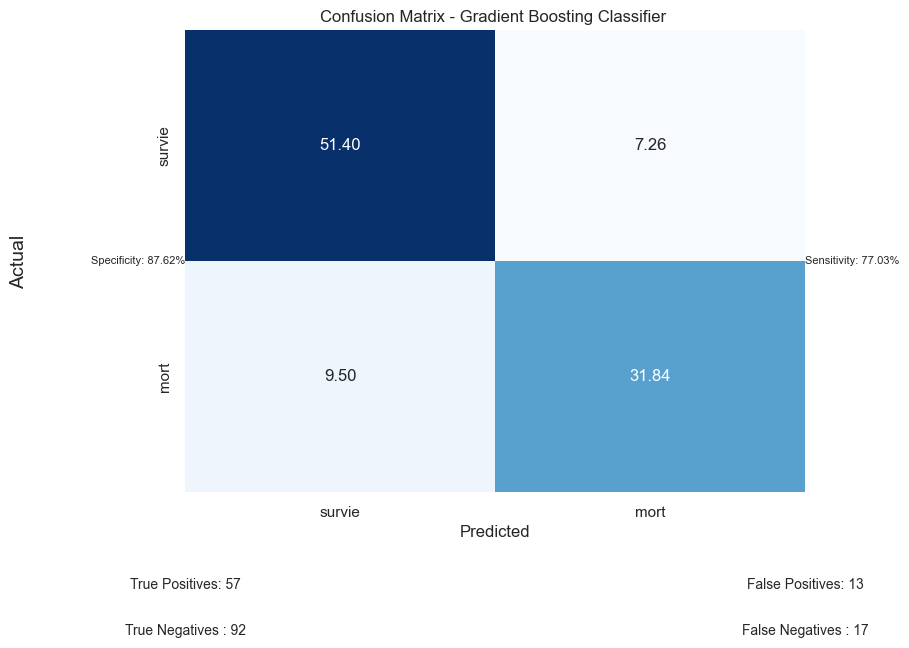

In [893]:
conf_matrix_gbc = confusion_matrix(y_test, y_pred_GBC)

tn, fp, fn, tp = conf_matrix_gbc.ravel()

total_samples = len(y_test)
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = (tp + tn) / total_samples * 100

conf_matrix_percent = conf_matrix_gbc / total_samples * 100

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues", cbar=False,
            xticklabels=["survie", "mort"], yticklabels=["survie", "mort"])
plt.xlabel('Predicted')
plt.ylabel('Actual', rotation=90, labelpad=100, fontsize=14, verticalalignment='center')
plt.title('Confusion Matrix - Gradient Boosting Classifier ')
plt.text(0, 0.5, f"Specificity: {specificity:.2f}%", horizontalalignment='right', verticalalignment='center', fontsize=8, transform=plt.gca().transAxes)
plt.text(1, 0.5, f"Sensitivity: {sensitivity:.2f}%", horizontalalignment='left', verticalalignment='center', fontsize=8, transform=plt.gca().transAxes)
plt.text(0, -0.2, f"True Positives: {tp}", horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.text(1, -0.2, f"False Positives: {fp}", horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.text(0, -0.3, f"True Negatives : {tn}", horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.text(1, -0.3, f"False Negatives : {fn}", horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.show()


In [894]:

data = {
    "Modèle": ["Decision Tree", "Random Forest", "Logistic Regression", "K-Nearest Neighbors", "Support Vector Machine", "Gradient Boosting Classifier"],
    "Précision": [precision_DT, precision_RF, precision_logistic_regression, precision_KNN, precision_SVM, precision_GBC],
    "Recall": [recall_DT, recall_RF, recall_logistic_regression, recall_KNN, recall_SVM, recall_GBC],
    "Accuracy": [accuracy_DT, accuracy_RF, accuracy_logistic_regression, accuracy_KNN, accuracy_SVM, accuracy_GBC],
    "Score F1": [f1_DT, f1_RF, f1_logistic_regression, f1_KNN, f1_SVM,f1_GBC]
}

df = pd.DataFrame(data)
df_sorted_accuracy = df.sort_values(by="Accuracy", ascending=False)
df_sorted_F1 = df.sort_values(by="Score F1", ascending=False)

print("Tableau trié selon Accuracy:")
print(df_sorted_accuracy)

print("\nTableau trié selon Score F1:")
print(df_sorted_F1)


Tableau trié selon Accuracy:
                         Modèle  Précision    Recall  Accuracy  Score F1
5  Gradient Boosting Classifier   0.814286  0.770270  0.832402  0.791667
4        Support Vector Machine   0.838710  0.702703  0.821229  0.764706
2           Logistic Regression   0.785714  0.743243  0.810056  0.763889
1                 Random Forest   0.800000  0.702703  0.804469  0.748201
0                 Decision Tree   0.816667  0.662162  0.798883  0.731343
3           K-Nearest Neighbors   0.779412  0.716216  0.798883  0.746479

Tableau trié selon Score F1:
                         Modèle  Précision    Recall  Accuracy  Score F1
5  Gradient Boosting Classifier   0.814286  0.770270  0.832402  0.791667
4        Support Vector Machine   0.838710  0.702703  0.821229  0.764706
2           Logistic Regression   0.785714  0.743243  0.810056  0.763889
1                 Random Forest   0.800000  0.702703  0.804469  0.748201
3           K-Nearest Neighbors   0.779412  0.716216  0.798883  0

le Gradient Boosting Classifier semble être le meilleur modèle, car il obtient le meilleur score d'accuracy et le meilleur score F1

c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


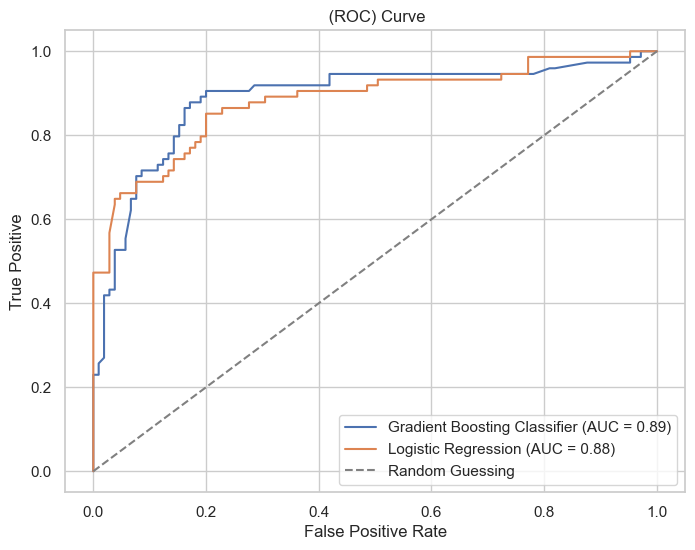

In [895]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier 
from sklearn.linear_model import LogisticRegression

models = {
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression()
}

plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_scores)
    auc_score = roc_auc_score(y_test, y_scores)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], color='gray', linestyle='--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive')
plt.title(' (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


c:\Users\MSI\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


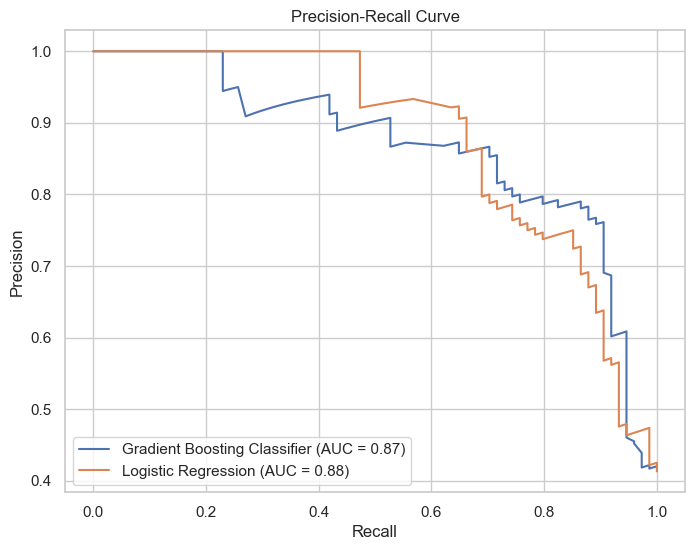

In [896]:
from sklearn.metrics import precision_recall_curve, auc
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression

models = {
    'Gradient Boosting Classifier': GradientBoostingClassifier(),
    'Logistic Regression': LogisticRegression()
}

plt.figure(figsize=(8, 6))
for name, model in models.items():
    model.fit(X_train, y_train)
    y_scores = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_scores)
    auc_score = auc(recall, precision)
    plt.plot(recall, precision, label=f'{name} (AUC = {auc_score:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()


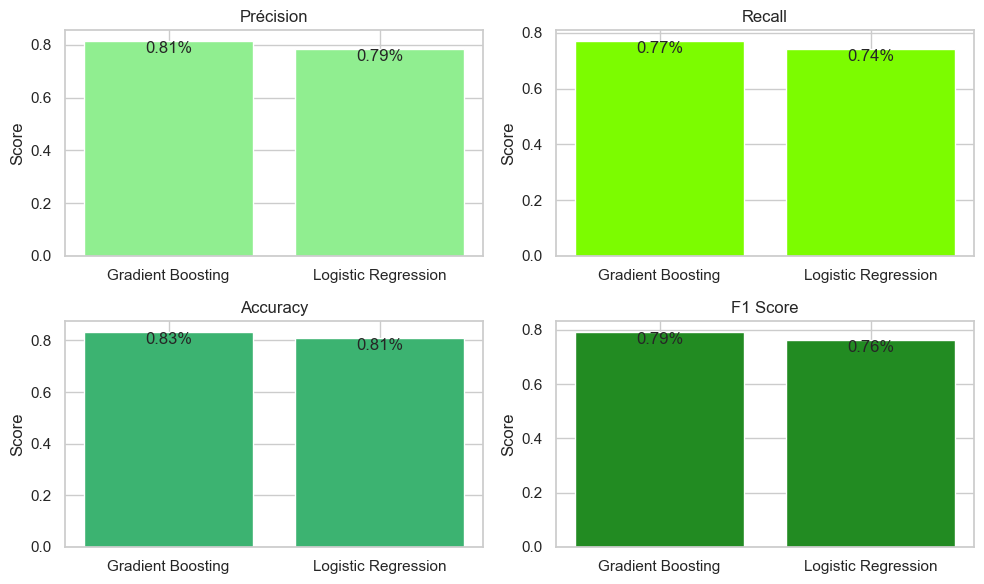

In [897]:
model_names = ['Gradient Boosting', 'Logistic Regression']
precisions = [precision_GBC, precision_logistic_regression]
recalls = [recall_GBC, recall_logistic_regression]
accuracies = [accuracy_GBC, accuracy_logistic_regression]
f1_scores = [f1_GBC, f1_logistic_regression]

plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
bars = plt.bar(model_names, precisions, color='lightgreen')
plt.title('Précision')
plt.ylabel('Score')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}%', ha='center', va='top')

# Recall
plt.subplot(2, 2, 2)
bars = plt.bar(model_names, recalls, color='lawngreen')
plt.title('Recall')
plt.ylabel('Score')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}%', ha='center', va='top')

plt.subplot(2, 2, 3)
bars = plt.bar(model_names, accuracies, color='mediumseagreen')
plt.title('Accuracy')
plt.ylabel('Score')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}%', ha='center', va='top')

plt.subplot(2, 2, 4)
bars = plt.bar(model_names, f1_scores, color='forestgreen')
plt.title('F1 Score')
plt.ylabel('Score')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, height, f'{height:.2f}%', ha='center', va='top')

plt.tight_layout()
plt.show()



In [898]:
import numpy as np
np.random.seed(42)  

from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.model_selection import train_test_split


param_dist = {
    'n_estimators': np.arange(50, 300),
    'learning_rate': np.linspace(0.01, 0.3, 30),
    'max_depth': np.arange(1, 11),
    'min_samples_split': np.arange(2, 21),
    'min_samples_leaf': np.arange(1, 11),
    'subsample': np.linspace(0.5, 1.0, 10),
    
}

random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(), param_distributions=param_dist, n_iter=10, cv=5, n_jobs=-1, verbose=2)
random_search.fit(X_train, y_train)
print("Meilleurs paramètres :", random_search.best_params_)

best_classifier_gradient_boosting = random_search.best_estimator_
y_pred_BM = best_classifier_gradient_boosting.predict(X_test)

precision_BM = precision_score(y_test, y_pred_BM)
recall_BM = recall_score(y_test, y_pred_BM)
accuracy_BM = accuracy_score(y_test, y_pred_BM)
f1_BM = f1_score(y_test, y_pred_BM)

print("Précision:", precision_BM)
print("Recall:", recall_BM)
print("Accuracy:", accuracy_BM)
print("Score F1:", f1_BM)


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Meilleurs paramètres : {'subsample': 0.6111111111111112, 'n_estimators': 79, 'min_samples_split': 15, 'min_samples_leaf': 8, 'max_depth': 2, 'learning_rate': 0.19999999999999998}
Précision: 0.8405797101449275
Recall: 0.7837837837837838
Accuracy: 0.8491620111731844
Score F1: 0.8111888111888111


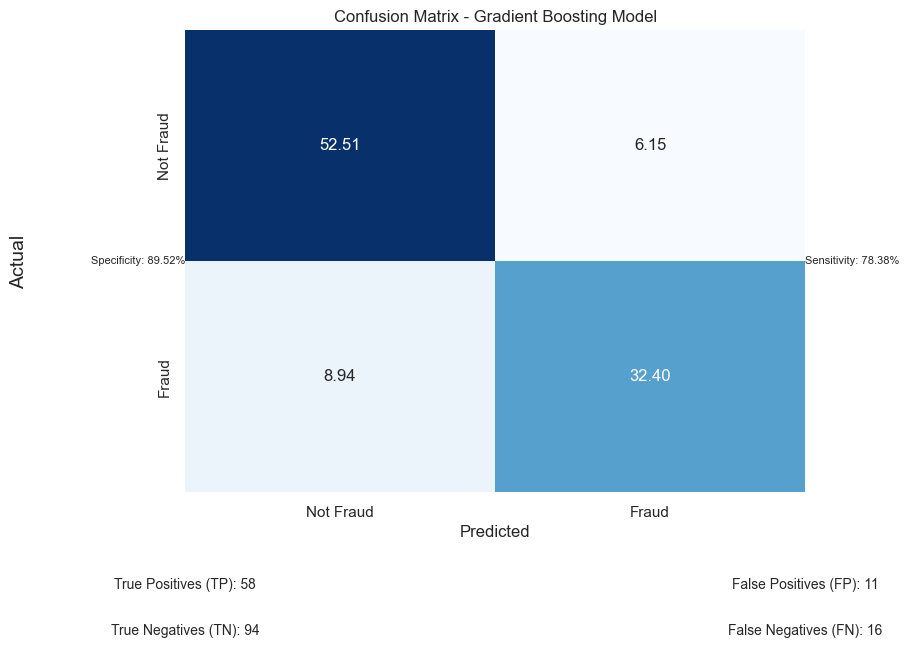

In [899]:


conf_matrix_BM = confusion_matrix(y_test, y_pred_BM)

tn, fp, fn, tp = conf_matrix_BM.ravel()

total_samples = len(y_test)
specificity = tn / (tn + fp) * 100
sensitivity = tp / (tp + fn) * 100
accuracy = (tp + tn) / total_samples * 100

conf_matrix_percent = conf_matrix_BM / total_samples * 100

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_percent, annot=True, fmt=".2f", cmap="Blues", cbar=False,
            xticklabels=["Not Fraud", "Fraud"], yticklabels=["Not Fraud", "Fraud"])
plt.xlabel('Predicted')
plt.ylabel('Actual', rotation=90, labelpad=100, fontsize=14, verticalalignment='center')
plt.title('Confusion Matrix - Gradient Boosting Model')
plt.text(0, 0.5, f"Specificity: {specificity:.2f}%", horizontalalignment='right', verticalalignment='center', fontsize=8, transform=plt.gca().transAxes)
plt.text(1, 0.5, f"Sensitivity: {sensitivity:.2f}%", horizontalalignment='left', verticalalignment='center', fontsize=8, transform=plt.gca().transAxes)
plt.text(0, -0.2, f"True Positives (TP): {tp}", horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.text(1, -0.2, f"False Positives (FP): {fp}", horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.text(0, -0.3, f"True Negatives (TN): {tn}", horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.text(1, -0.3, f"False Negatives (FN): {fn}", horizontalalignment='center', verticalalignment='center', fontsize=10, transform=plt.gca().transAxes)
plt.show()


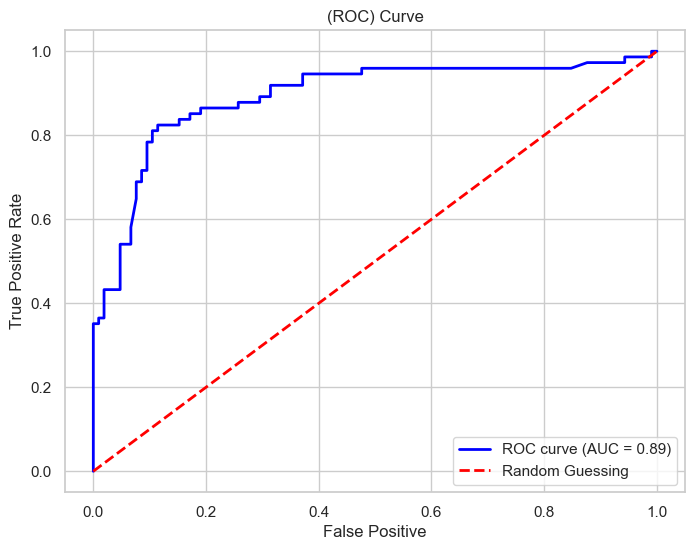

In [900]:

y_prob_BM = best_classifier_gradient_boosting.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob_BM)

roc_auc = roc_auc_score(y_test, y_prob_BM)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--', label='Random Guessing')
plt.xlabel('False Positive')
plt.ylabel('True Positive Rate')
plt.title('(ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


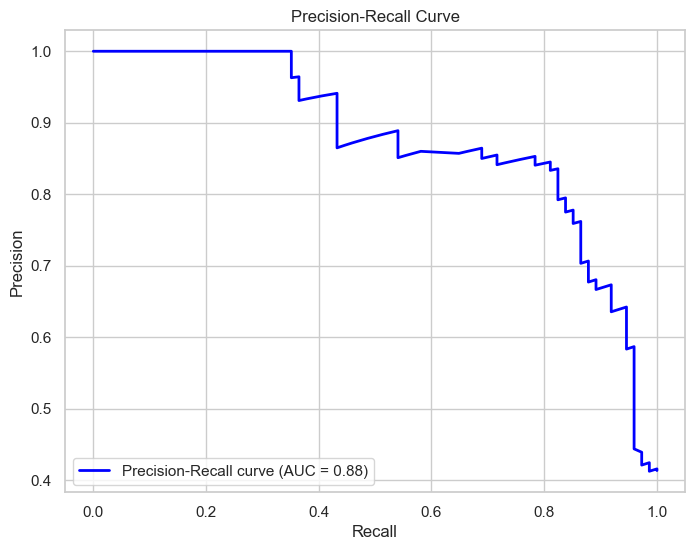

In [901]:
precision, recall, thresholds = precision_recall_curve(y_test, y_prob_BM)
auc_pr = auc(recall, precision)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % auc_pr)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.grid(True)
plt.show()


In [902]:

csv1_path = r'C:\Users\MSI\Desktop\Projet_ML\test.csv'
test = pd.read_csv(csv1_path)

print(test)

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

In [903]:
test.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [904]:
test['Age'] = test['Age'].fillna(np.ceil(test['Age'].mean()))
test['Embarked'] = test['Embarked'].fillna(test['Embarked'].mode()[0]) 
test['Fare'] = test['Fare'].fillna(np.ceil(test['Fare'].mean()))
test.drop(columns='Cabin', inplace=True)

test.isnull().sum()


PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [905]:
id = test['PassengerId']
test.drop(columns=['Name', 'PassengerId', 'Ticket'], inplace=True)
test.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    object 
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [906]:
ccol = test.dtypes[test.dtypes == "object"].index
ccol

Index(['Sex', 'Embarked'], dtype='object')

In [907]:
print("Before")
print(test.shape)
test = pd.get_dummies(test).astype(int)
print("After")
print(test.shape)

Before
(418, 7)
After
(418, 10)


In [908]:
test_pred = best_classifier_gradient_boosting.predict(test)


In [909]:
print(test)


     Pclass  Age  SibSp  Parch  Fare  Sex_female  Sex_male  Embarked_C  \
0         3   34      0      0     7           0         1           0   
1         3   47      1      0     7           1         0           0   
2         2   62      0      0     9           0         1           0   
3         3   27      0      0     8           0         1           0   
4         3   22      1      1    12           1         0           0   
..      ...  ...    ...    ...   ...         ...       ...         ...   
413       3   31      0      0     8           0         1           0   
414       1   39      0      0   108           1         0           1   
415       3   38      0      0     7           0         1           0   
416       3   31      0      0     8           0         1           0   
417       3   31      1      1    22           0         1           1   

     Embarked_Q  Embarked_S  
0             1           0  
1             0           1  
2             1      

In [910]:
print(Mydata)

     Survived  Pclass  Age  SibSp  Parch  Fare  Sex_female  Sex_male  \
0           0       3   22      1      0     7           0         1   
1           1       1   38      1      0    71           1         0   
2           1       3   26      0      0     7           1         0   
3           1       1   35      1      0    53           1         0   
4           0       3   35      0      0     8           0         1   
..        ...     ...  ...    ...    ...   ...         ...       ...   
886         0       2   27      0      0    13           0         1   
887         1       1   19      0      0    30           1         0   
888         0       3   30      1      2    23           1         0   
889         1       1   26      0      0    30           0         1   
890         0       3   32      0      0     7           0         1   

     Embarked_C  Embarked_Q  Embarked_S  
0             0           0           1  
1             1           0           0  
2        

In [911]:
csv2_path = r'C:\Users\MSI\Desktop\Projet_ML\gender_submission.csv'
sub = pd.read_csv(csv2_path)

print(sub)




     PassengerId  Survived
0            892         0
1            893         1
2            894         0
3            895         0
4            896         1
..           ...       ...
413         1305         0
414         1306         1
415         1307         0
416         1308         0
417         1309         0

[418 rows x 2 columns]


In [912]:
print(test_pred)

[0 0 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 0 1 0 0 0 0 0 1 0 1 0 1
 0 0 0 0 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 1 1 1 0 1 0
 1 0 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 1 1 0 1 1 0 1
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [913]:
id.count()


418

In [914]:
sub = pd.DataFrame()
sub['PassengerId'] = id
sub['Survived'] = test_pred
sub.to_csv('submissionY.csv',index=False)